In [14]:
import pandas as pd
import requests as rs
from selenium import webdriver
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup# as soup
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [15]:
# Initialize Chrome webdriver
driver = webdriver.Chrome() 
base_url = "https://nuforc.org/subndx/?id=all"
driver.get(base_url)

# Initialize lists to store headers and data
headers = []
data = []

# Need to Loop through all website pages
while True:
    # Get the current page HTML
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')

    # Table Data
    table = soup.find('table')
    if not headers:  # Need this because only need the headers once as they are the same
        headers = [th.text.strip() for th in table.find_all('th')]

    # Data rows
    data_rows = table.find_all('tr')[1:]  # This Skips the header row
    for row in data_rows:
        data.append([td.text.strip() for td in row.find_all('td')])  # Include all columns

    # Need to wait for the next button
    next_button = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.ID, "table_1_next"))
    )

    # Check if the next button is disabled
    if 'disabled' in next_button.get_attribute('class'):
        break  # Break loop if next button is disabled

    # Click the next button
    next_button.click()

# Close the webdriver
driver.quit()



In [16]:
# Did not pull columns reported or posted
df = pd.DataFrame(data,columns=headers)
df.head()

,Link,Occurred,City,State,Country,Shape,Summary,Reported,Posted,Media
0,Open,02/02/1995 23:00,Shady Grove,OR,USA,,"Man and wife witness very bright, moving light...",02/03/1995,11/02/1999,
1,Open,02/02/1995 19:15,Denmark,WI,USA,Cone,Many witness strange craft streaking in night ...,02/03/1995,11/02/1999,
2,Open,02/02/1995 20:10,Traverse City,MI,USA,,4 children report seeing disc above them; bath...,02/03/1995,11/02/1999,
3,Open,12/13/1994 18:55,Murphy,NC,USA,,"Woman reports seeing strange, lighted obj. wit...",02/03/1995,11/02/1999,
4,Open,02/03/1995 23:25,Fontana,CA,USA,,8 adults witness five lights in northern sky f...,03/04/1995,11/02/1999,


In [17]:
df.tail()

,Link,Occurred,City,State,Country,Shape,Summary,Reported,Posted,Media
194925,Open,02/27/2024 08:10,Escondido,CA,USA,Other,The plane like object turned around in mid air...,Y,None,None
194926,Open,02/26/2024 22:10,Los Angeles,CA,USA,Orb,Just past the Federal building silent object w...,,None,None
194927,Open,02/26/2024 21:40,New York,NY,USA,Light,"Light flew by then went away , small almost on...",,None,None
194928,Open,02/26/2024 21:26,Marion,IA,USA,Chevron,Partial V shape,,None,None
194929,,,,,,,,,None,None


In [21]:
df = pd.DataFrame(data,columns=headers).drop(columns=['Link','Media', 'Posted'])
df.head()

,Occurred,City,State,Country,Shape,Summary,Reported
0,02/02/1995 23:00,Shady Grove,OR,USA,,"Man and wife witness very bright, moving light...",02/03/1995
1,02/02/1995 19:15,Denmark,WI,USA,Cone,Many witness strange craft streaking in night ...,02/03/1995
2,02/02/1995 20:10,Traverse City,MI,USA,,4 children report seeing disc above them; bath...,02/03/1995
3,12/13/1994 18:55,Murphy,NC,USA,,"Woman reports seeing strange, lighted obj. wit...",02/03/1995
4,02/03/1995 23:25,Fontana,CA,USA,,8 adults witness five lights in northern sky f...,03/04/1995


In [30]:
blank_data = df[df.isnull().any(axis=1)]

# Print rows with blank data
print("Rows with blank data:")
print(blank_data)

Rows with blank data:
       Occurred City State Country Shape Summary Reported Date Occured  \
100                                                                      
201                                                                      
302                                                                      
403                                                                      
504                                                                      
...         ...  ...   ...     ...   ...     ...      ...          ...   
194525                                                                   
194626                                                                   
194727                                                                   
194828                                                                   
194929                                                                   

       Time Occured  
100            None  
201            None  
302            None  
4

In [33]:
# Check for blank values in the "Country" column
blank_country_data = df[df['Country'].isnull()]

blank_country_data

,Occurred,City,State,Country,Shape,Summary,Reported,Date Occured,Time Occured


In [22]:
df.shape

(194930, 7)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194930 entries, 0 to 194929
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Occurred  194930 non-null  object
 1   City      194930 non-null  object
 2   State     194930 non-null  object
 3   Country   194930 non-null  object
 4   Shape     194930 non-null  object
 5   Summary   194930 non-null  object
 6   Reported  194930 non-null  object
dtypes: object(7)
memory usage: 10.4+ MB


In [24]:
df.Shape.value_counts()

Orb          34722
Other        32794
Light        23148
Unknown      15433
Circle       13503
Triangle      9646
Oval          9645
Chevron       5788
Fireball      5788
Changing      5787
Sphere        5787
Cigar         5787
Disk          3859
Formation     3858
Cube          3858
Rectangle     3858
Cylinder      3858
              2023
Egg           1929
Cross         1929
Flash         1929
Cone             1
Name: Shape, dtype: int64

In [25]:
df[['Date Occured','Time Occured']]=df.Occurred.str.split(' ',expand=True)
df

,Occurred,City,State,Country,Shape,Summary,Reported,Date Occured,Time Occured
0,02/02/1995 23:00,Shady Grove,OR,USA,,"Man and wife witness very bright, moving light...",02/03/1995,02/02/1995,23:00
1,02/02/1995 19:15,Denmark,WI,USA,Cone,Many witness strange craft streaking in night ...,02/03/1995,02/02/1995,19:15
2,02/02/1995 20:10,Traverse City,MI,USA,,4 children report seeing disc above them; bath...,02/03/1995,02/02/1995,20:10
3,12/13/1994 18:55,Murphy,NC,USA,,"Woman reports seeing strange, lighted obj. wit...",02/03/1995,12/13/1994,18:55
4,02/03/1995 23:25,Fontana,CA,USA,,8 adults witness five lights in northern sky f...,03/04/1995,02/03/1995,23:25
...,...,...,...,...,...,...,...,...,...
194925,02/27/2024 08:10,Escondido,CA,USA,Other,The plane like object turned around in mid air...,Y,02/27/2024,08:10
194926,02/26/2024 22:10,Los Angeles,CA,USA,Orb,Just past the Federal building silent object w...,,02/26/2024,22:10
194927,02/26/2024 21:40,New York,NY,USA,Light,"Light flew by then went away , small almost on...",,02/26/2024,21:40
194928,02/26/2024 21:26,Marion,IA,USA,Chevron,Partial V shape,,02/26/2024,21:26


In [26]:
clean_df = df[['Date Occured', 'Time Occured', 'City', 'State', 'Country', 'Shape', 'Summary' ]]

clean_df.head()

,Date Occured,Time Occured,City,State,Country,Shape,Summary
0,02/02/1995,23:00,Shady Grove,OR,USA,,"Man and wife witness very bright, moving light..."
1,02/02/1995,19:15,Denmark,WI,USA,Cone,Many witness strange craft streaking in night ...
2,02/02/1995,20:10,Traverse City,MI,USA,,4 children report seeing disc above them; bath...
3,12/13/1994,18:55,Murphy,NC,USA,,"Woman reports seeing strange, lighted obj. wit..."
4,02/03/1995,23:25,Fontana,CA,USA,,8 adults witness five lights in northern sky f...


# Countries

In [28]:
num_countries = clean_df['Country'].nunique()
num_countries 

9

In [29]:
countries_count = clean_df['Country'].value_counts()
countries_count

USA             175639
South Africa      3858
Canada            3858
                  1930
Unspecified       1929
Romania           1929
Bangladesh        1929
Brazil            1929
Australia         1929
Name: Country, dtype: int64

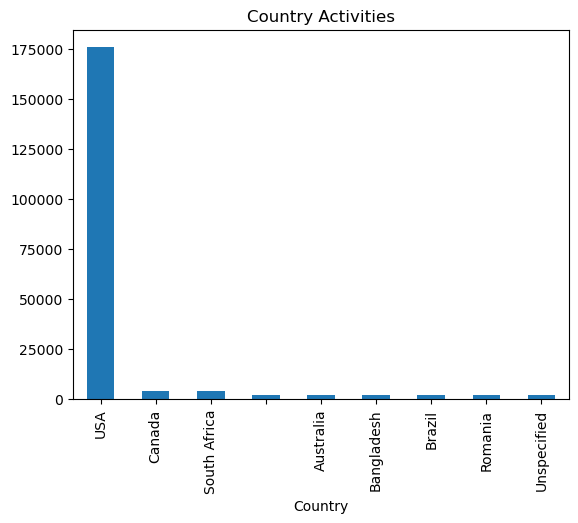

In [27]:
clean_df.groupby('Country').size().sort_values(ascending=False).plot.bar(title='Country Activities');

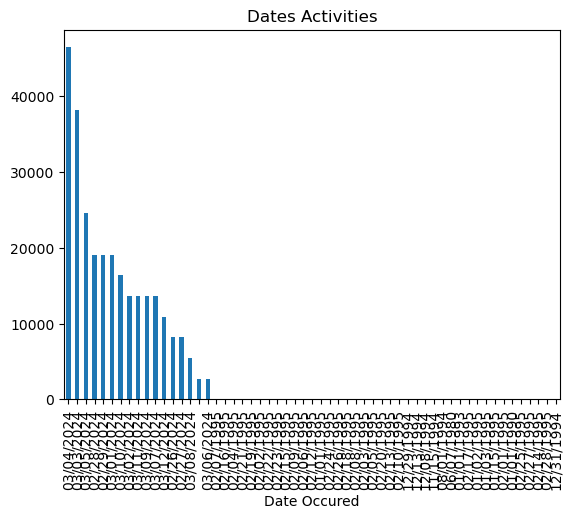

In [12]:
df1.groupby('Date Occured').size().sort_values(ascending=False).plot.bar(title='Dates Activities');

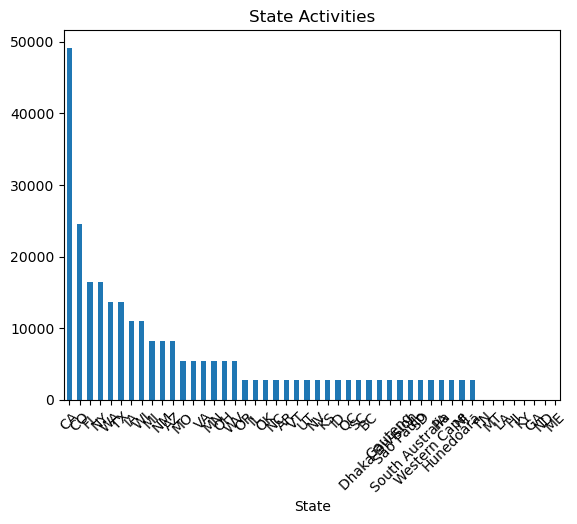

In [13]:
#This takes all states from all countries...
df1.groupby('State').size().sort_values(ascending=False).plot.bar(title='State Activities', rot=45);